In [1]:
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import math as math
import twstock
import pandas_datareader as pdr

In [138]:
# 取當日股票成交資訊
# param: date => 日期(yyyyMMdd)
# param: codeList => 股票代號列表
def getDailyStockInfo(date,codeList=[]):
    time = datetime.datetime.now()  
    print("查詢日期:" + date[:4]+":"+str(time.minute))
    api = 'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date={date}&type=ALLBUT0999&_=1575967266317'.format(date=date)
    res = requests.get(api)
    lines = res.text.split("\r\n")
    newlines = []
    for line in lines:
        if len(line.split('","')) > 15:
            newlines.append(line)
    s = "\n".join(newlines)
    s = s.replace('=','')
    df = pd.read_csv(StringIO(s))
    dfCname = df.iloc[:,:2]
    df = df.astype(str)
    df = df.applymap(lambda s : s.replace(',',''))
    df = df.set_index('證券代號')
    df = df[df.columns[:-1]]
    df = df.apply(lambda s: pd.to_numeric(s, errors='coerce'))
    df.dropna(axis=1,how='all',inplace=True)
    df = df.join(dfCname.set_index('證券代號'))
    if len(codeList)>0:
        return df[df.index.isin(codeList)]
    else:
        return df
    
getDailyStockInfo('20191031',['6443'])
#     return df[df.證券名稱.str.contains('和潤')]

查詢日期:2019:8


,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,證券名稱
證券代號,,,,,,,,,,,,,,
6443,21901899,3685,182547377,8.38,8.38,8.15,8.38,0.76,8.38,16331.0,NaN,0.0,0.0,元晶


In [109]:
getDailyStockInfo('20191030',['6443'])

查詢日期:2019:40


,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,證券名稱
證券代號,,,,,,,,,,,,,,
6443,2537603,669,19142687,7.51,7.65,7.46,7.62,0.12,7.61,10,7.62,16,0.0,元晶


In [139]:
getDailyStockInfo('20191031',['6443'])

查詢日期:2019:18


,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,證券名稱
證券代號,,,,,,,,,,,,,,
6443,21901899,3685,182547377,8.38,8.38,8.15,8.38,0.76,8.38,16331.0,NaN,0.0,0.0,元晶


In [104]:
def crawl_Dividend_Report(url, stockNo):
    
    form_data = {
        'encodeURIComponent':1,
        'step':1,
        'firstin':1,
        'off':1,
        'co_id':stockNo,
        'TYPEK':"all"
    }

    r = requests.post(url,form_data)
    print(pd.read_html(r.text))
    html_df = pd.read_html(r.text)[1].fillna("")
    return html_df

crawl_Dividend_Report("https://mops.twse.com.tw/mops/web/ajax_t05st09", 6592)

[                       0
0  本資料由　(上市公司) 和潤企業　公司提供,                0                      1                  2                 3   \
0            股利年度                  股東會日期                 期別  期初未分配盈餘/待彌補虧損(元)   
1  盈餘分配之現金股利(元/股)  法定盈餘公積、資本公積發放之現金(元/股)  股東配發之現金(股利)總金額(元)      盈餘轉增資配股(元/股)   
2             NaN                    NaN                NaN               NaN   
3             107              108/06/25                  1        3493834423   
4             106              107/06/28                  1        3092984601   
5             105              106/06/20                  1        2735592154   

                      4           5              6           7          8   \
0            本期淨利(淨損)(元)    可分配盈餘(元)  分配後期末未分配盈餘(元)      股東配發內容    董監酬勞(元)   
1  法定盈餘公積、資本公積轉增資配股(元/股)  股東配股總股數(股)     現金紅利金額(元)H  股票紅利金額(元)I  股票紅利股數(股)   
2                    NaN         NaN            NaN         NaN        NaN   
3             1761514825  5028330883     3792116540  3.30000000     

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,股利年度,股東會日期,期別,期初未分配盈餘/待彌補虧損(元),本期淨利(淨損)(元),可分配盈餘(元),分配後期末未分配盈餘(元),股東配發內容,董監酬勞(元),員工紅利,...,摘錄公司章程-股利分派部分,普通股每股面額,,,,,,,,
1,盈餘分配之現金股利(元/股),法定盈餘公積、資本公積發放之現金(元/股),股東配發之現金(股利)總金額(元),盈餘轉增資配股(元/股),法定盈餘公積、資本公積轉增資配股(元/股),股東配股總股數(股),現金紅利金額(元)H,股票紅利金額(元)I,股票紅利股數(股),股票紅利股數佔盈餘轉增資之比例(%),...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,107,108/06/25,1,3493834423,1761514825,5028330883,3792116540,3.30000000,0.0,1236214343,...,0,0,0,0,0,0,,不適用,第廿八之一條：本公司每年決算後如有盈餘時，除依法提撥應納營利事業所得稅並彌補歷年虧損外，於分...,新台幣 10.0000元
4,106,107/06/28,1,3092984601,1474898091,4392899400,3493834423,2.40000000,0.0,899064977,...,0,0,0,0,0,0,,不適用,第廿九之一條：本公司每年決算後如有盈餘時，除依法提撥應納營利事業所得稅並彌補歷年虧損外，於分...,新台幣 10.0000元
5,105,106/06/20,1,2735592154,1271972511,3863211608,3092984601,1.50000000,0.0,525154787,...,245072220,0,0,0,0,0,,不適用,第廿九之一條：本公司每年決算後如有盈餘時，除依法提撥應納營利事業所得稅並彌補歷年虧損外，於分...,新台幣 10.0000元


In [76]:
## 抓取股票當盤成交資訊

stock_list = 'tse_6592.tw|tse_6443.tw'
invast = 103
invast_amount = 25

query_url = "http://mis.twse.com.tw/stock/api/getStockInfo.jsp?ex_ch="+ stock_list
data = json.loads(requests.get(query_url).text)
# 過濾出有用到的欄位
columns = ['c','n','z','tv','v','o','h','l','y']
df = pd.DataFrame(data['msgArray'],columns=columns)
df.columns = ['股票代號','公司簡稱','當盤成交價','當盤成交量','累積成交量','開盤價','最高價','最低價','昨收價']
# 新增漲跌百分比
df.iloc[:, [2,3,4,5,6,7,8]] = df.iloc[:, [2,3,4,5,6,7,8]].astype(float)
df['投資金額'] = invast
df['持有股票數'] = invast_amount
df['目前虧損'] = (df['投資金額'] - df['當盤成交價'])*df['持有股票數'] * 1000
df['漲跌百分比'] = (df['當盤成交價'] - df['昨收價'])/df['昨收價'] * 100
df[df['股票代號'] == '6443']
# data

,股票代號,公司簡稱,當盤成交價,當盤成交量,累積成交量,開盤價,最高價,最低價,昨收價,投資金額,持有股票數,目前虧損,漲跌百分比
1,6443,元晶,7.35,27,665,7.33,7.38,7.33,7.33,103,25,2.39125e+06,0.272851


## 抓取股票資訊 
### DataReader

| 參數名稱 | 描述 |
| -------- | -------- |
| Open | 開盤價|
|High | 最高價|
|Low |	最低價|
|Close |	收盤價|
|Volume	| 交易量|
|Adj Close | 經過調整的收盤價|

* pct_change() 收益率
    > (前一天收盤價 - 當天收盤價) / 當天收盤價  

In [40]:
startTime = '2018-10-01'
endTime = '2018-10-30'
df = pdr.DataReader('2330.TW', 'yahoo', startTime, endTime)

ValueError: start must be an earlier date than end

In [70]:
start = datetime.datetime(2019,1,1)
df_6443 = pdr.DataReader('6443.TW', 'yahoo', start=start)
df_2069 = pdr.DataReader('2069.TW', 'yahoo', start=start)
company = ['6443.TW','2069.TW']
df_stock = pdr.DataReader(company,'yahoo',start=start)

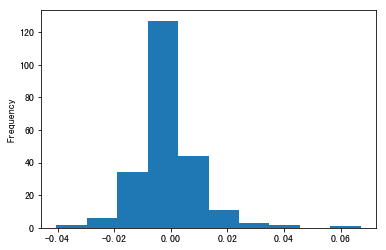

In [64]:
# 算收益率
df_2069['daily-return'] = df_2069['Adj Close'].pct_change()
df_2069['daily-return'].plot(label='阿不知道',kind='hist')

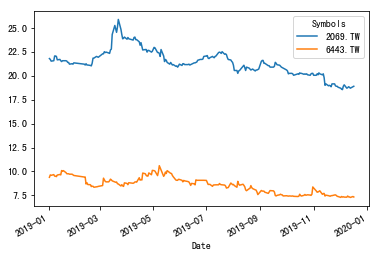

In [77]:
adj = df_stock['Adj Close']
adj.plot()

In [187]:
import talib
import mpl_finance as mpf
start = datetime.datetime(2019,10,1)
# end = datetime.datetime(2019,11,2)
df = pdr.DataReader('6561.TWO','yahoo',start=start)
df.index = df.index.format(formatter=lambda x: x.strftime('%m%d'))


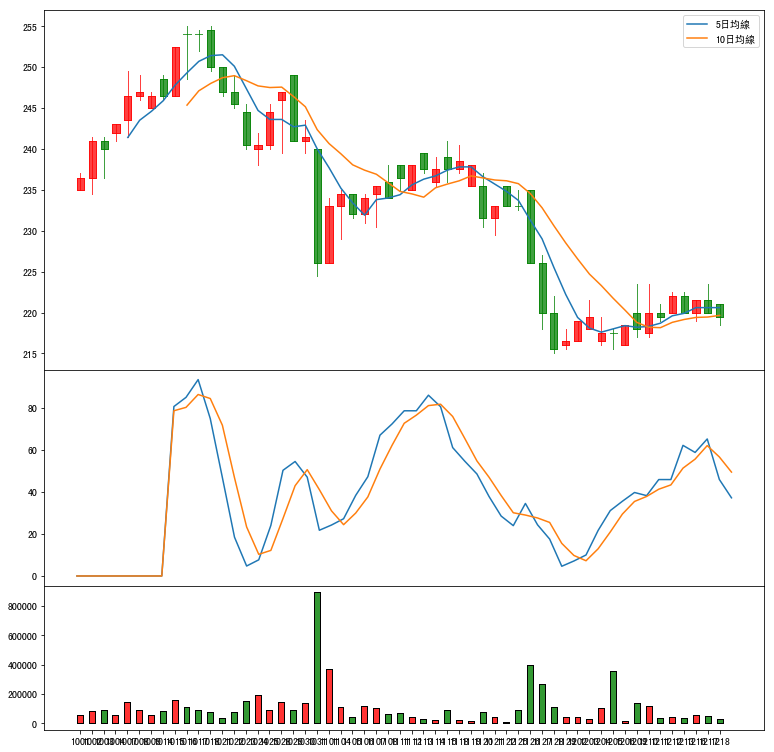

In [205]:
ma_5 = talib.SMA(np.array(df['Close']), 5)
ma_10 = talib.SMA(np.array(df['Close']), 10)
df['k'], df['d'] = talib.STOCH(df['High'], df['Low'], df['Close'])
df['k'].fillna(value=0, inplace=True)
df['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
fig.set_size_inches(10,10)
ax = fig.add_axes([0,0.5,1,0.5])
ax2 = fig.add_axes([0,0.2,1,0.3])
ax3 = fig.add_axes([0,0,1,0.2])

# ax = fig.add_subplot(1,1,1)
ax.set_xticks(range(0, len(df.index), 1))
ax.set_xticklabels(df.index)
# ax.tick_params(labelsize=20)
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 
ax.plot(ma_5, label='5日均線')
ax.plot(ma_10, label='10日均線')

ax2.set_xticks(range(0, len(df.index), 1))
ax2.set_xticklabels(df.index)
ax2.plot(df['k'], label='K值')
ax2.plot(df['d'], label='D值')

mpf.volume_overlay(ax3, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df.index), 1))
ax3.set_xticklabels(df.index)

ax.legend();
fig.savefig('asss.png', bbox_inches='tight')